In [2]:
def plot_metrics(groups, metrics=['avg_reward'], xlim=None, smooth=False):
    # open outputs/*.pt and load the tuple inside, open the first element in the tuple and print the mean
    import torch
    from scipy.ndimage import gaussian_filter1d
    import os

    # scan the directory for all the outputs *.pt
    files = {}
    for name, root in groups.items():
        files[name] = os.path.join(root, "training_stats.json")

    # plot the rewards per epoch
    import matplotlib.pyplot as plt
    # create subplots for each metric in metrics
    fig, ax = plt.subplots(1, len(metrics), figsize=(4 * len(metrics), 4))
    # If there's only one metric, make ax a list for consistency
    if len(metrics) == 1:
        ax = [ax]

    for name, file_path in files.items():
        import json
        import pandas as pd

        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
        except FileNotFoundError:
            print(f"File {file_path} not found. Skipping.")
            continue

        for i, metric in enumerate(metrics):
            metric_data = [d[metric] for d in data if metric in d]
            # Apply smoothing to the metric data
            if smooth:
                window_size = 5  # Adjust the window size as needed
                # Using pandas rolling average for smoother curves
                smoothed_data = pd.Series(metric_data).rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill').values
            else:
                smoothed_data = metric_data

            ax[i].plot([d['epoch'] for d in data if metric in d], smoothed_data, label=name if i == 0 else None, linewidth=2)
            ax[i].set_xlabel('epoch')
            ax[i].set_ylabel(metric)
            # make nice background gray grid
            ax[i].grid(color='white', linestyle='-', linewidth=0.5)
            # a bit like seaborn one
            ax[i].patch.set_facecolor('lightgray')
            # transparency?
            ax[i].patch.set_alpha(0.5)
            # make border bigger
            for spine in ax[i].spines.values():
                spine.set_linewidth(2)
            # also ticks
            ax[i].tick_params(width=2)
            if xlim:
                ax[i].set_xlim(*xlim)

    fig.legend(loc='upper right', bbox_to_anchor=(0.5, 1.1), ncol=len(metrics))
    fig.tight_layout()

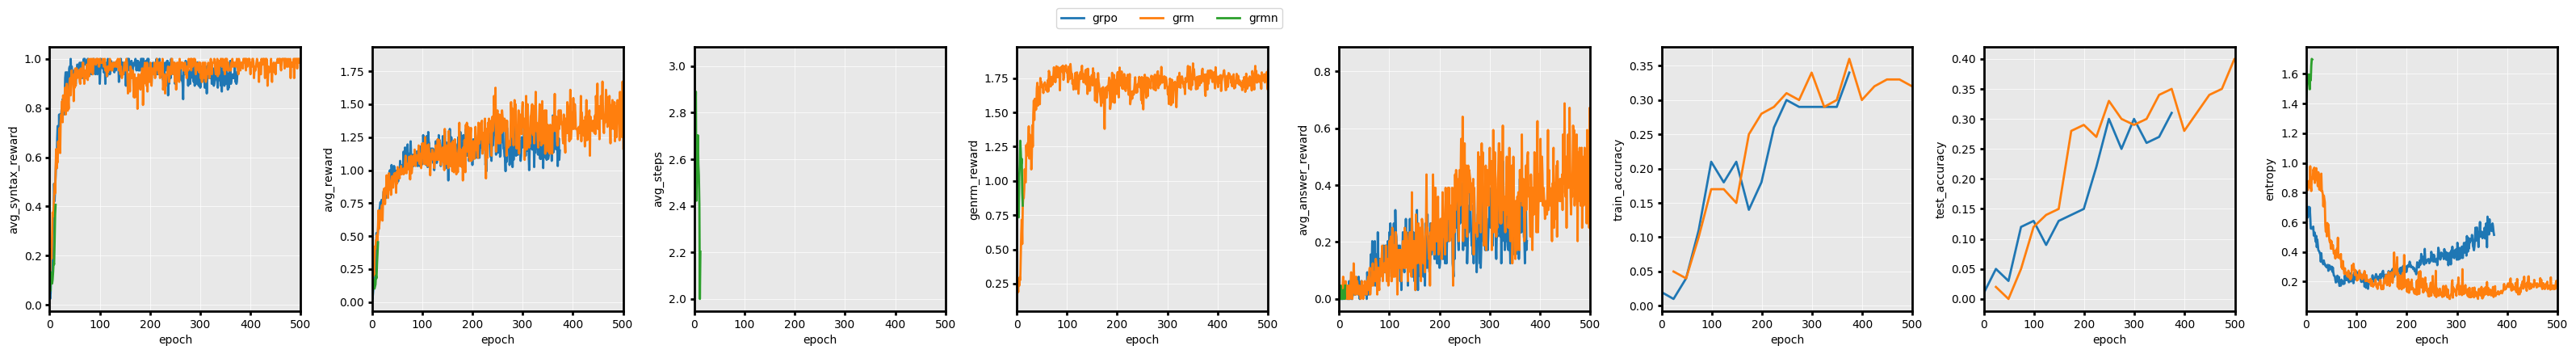

In [10]:
plot_metrics(
    {
        "grpo": "runs_outputs/grpo_42_baseline/",
        "grm": "/data/alsordon/runs_outputs/genrm_cd_q1.5i_42/",
        "grmn": "/data/alsordon/runs_outputs/genrm_cd_q1.5i_vppo_weight_42/",
    },
    metrics=["avg_syntax_reward", "avg_reward", "avg_steps", "genrm_reward", "avg_answer_reward", "train_accuracy", "test_accuracy", "entropy"],
    xlim=(0, 500),
    smooth=False,
)

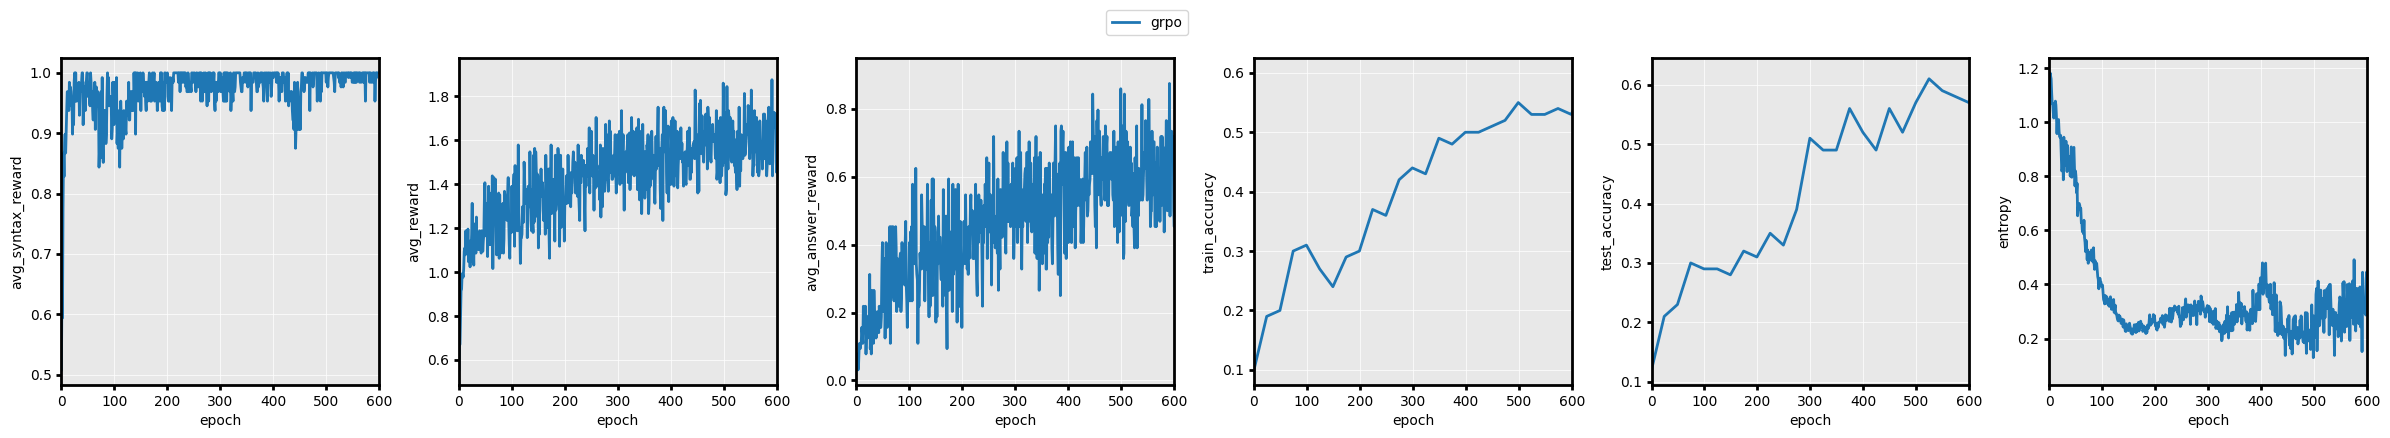

In [4]:
plot_metrics(
    {
        "grpo": "/data/alsordon/runs_outputs/grpo_cd_42/",
    },
    metrics=["avg_syntax_reward", "avg_reward", "avg_answer_reward", "train_accuracy", "test_accuracy", "entropy"],
    xlim=(0, 600),
)